Steps involved in performing sentiment analysis

1.Understand the Problem Statement
2.Tweets Preprocessing and Cleaning
    Data Inspection
    Data Cleaning
3.Story Generation and Visualization from Tweets
4.Extracting Features from Cleaned Tweets:
    Bag-of-Words
    TF-IDF
    Word Embeddings
5.Model Building: Sentiment Analysis
    Logistic Regression
    Support Vector Machine
    RandomForest
    XGBoost
6.Model Fine-tuning

https://courses.analyticsvidhya.com/courses/take/twitter-sentiment-analysis/

In [51]:
import re

In [52]:
import nltk


In [53]:
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
pd.set_option("display.max_colwidth",200)

In [55]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [56]:
%matplotlib inline

In [57]:
train = pd.read_csv("D:/abcd/twitter-sentiment-analysis-av/data/train_E6oV3lV.csv")

In [58]:
test =  pd.read_csv("D:/abcd/twitter-sentiment-analysis-av/data/test_tweets_anuFYb8.csv")

In [59]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [60]:
#data inspection

In [61]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [62]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [63]:
train.shape

(31962, 3)

In [64]:
test.shape

(17197, 2)

In [65]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [66]:
length_train = train['tweet'].str.len() 

In [67]:
length_train

0        102
1        122
2         21
3         86
4         39
5        116
6         74
7        143
8         87
9         50
10       111
11       133
12        51
13        74
14       101
15        56
16        58
17        22
18        78
19        58
20       127
21        70
22       100
23        47
24        95
25        79
26       127
27        72
28        43
29       135
        ... 
31932     20
31933    108
31934     59
31935    138
31936    126
31937     18
31938    112
31939     45
31940     34
31941     89
31942     62
31943     69
31944    101
31945     68
31946     82
31947    112
31948     87
31949    110
31950    115
31951     57
31952     35
31953    101
31954    108
31955     92
31956     61
31957     68
31958    131
31959     63
31960     67
31961     32
Name: tweet, Length: 31962, dtype: int64

In [68]:
length_test = test['tweet'].str.len()

In [69]:
length_test

0         90
1        101
2         71
3        142
4         93
5         27
6         92
7         85
8        108
9         66
10        89
11        65
12        57
13       107
14        99
15        98
16        89
17        92
18        58
19       110
20        64
21       116
22        96
23        51
24       114
25        91
26        38
27        95
28        80
29       117
        ... 
17167     56
17168    107
17169    107
17170     56
17171     86
17172    116
17173    109
17174    110
17175     96
17176     46
17177     52
17178    100
17179    109
17180    111
17181     90
17182     53
17183     96
17184    106
17185     88
17186    107
17187    102
17188    110
17189     64
17190     99
17191     91
17192    108
17193     96
17194    145
17195    104
17196     64
Name: tweet, Length: 17197, dtype: int64

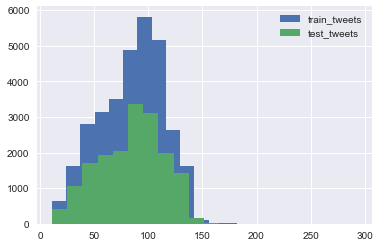

In [70]:
plt.hist(length_train, bins = 20, label = "train_tweets")
plt.hist(length_test, bins = 20, label = "test_tweets")
plt.legend()
plt.show()

In [71]:
#data cleaning 
#The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

In [72]:
combi = train.append(test, ignore_index=True)#combine both test and train for applying the preprocessing steps on both the dataset at the same time

C:\Users\varun-sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [73]:
combi.shape

(49159, 3)

In [74]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '' , input_txt)
    return input_txt

In [75]:
#STEP 1 - REMOVING TWITTER HANDLES


In [76]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [77]:
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so #gr8 !


In [78]:
#STEP 2- REMOVING PUNCTUATIONS, NUMVBERS AND SPECIAL CHARACTERS

In [79]:
#The regular expression “[^a-zA-Z#]” means anything except alphabets and ‘#’.

In [80]:
combi['tidy_tweet']= combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")

In [81]:
combi.head(10)


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [82]:
#STEP 3- REMOVIMG SHORT WORDS

In [83]:
combi["tidy_tweet"] = combi["tidy_tweet"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [84]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [85]:
#STEP 4- TEXT NORMALIZATIOM
#Here we will use nltk’s PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets

In [86]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

In [87]:
tokenized_tweet.head(10)

0                                                      [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1                                          [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                                                           [bihday, your, majesty]
3                                                                                                  [#model, love, take, with, time]
4                                                                                                [factsguide, society, #motivation]
5                                   [huge, fare, talking, before, they, leave, chaos, disputes, when, they, there, #allshowandnogo]
6                                                                                                        [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about, that, #school, #exams, 

In [88]:
from nltk.stem.porter import *

In [89]:
stemmer = PorterStemmer()

In [90]:
tokenized_tweet = tokenized_tweet.apply(lambda x : [stemmer.stem(i) for i in x])

In [91]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

In [92]:
combi["tidy_tweet"].head(10)

0                                                      when father dysfunct selfish drag kid into dysfunct #run
1                                        thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2                                                                                           bihday your majesti
3                                                                                    #model love take with time
4                                                                                      factsguid societi #motiv
5                                    huge fare talk befor they leav chao disput when they there #allshowandnogo
6                                                                                           camp tomorrow danni
7    next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl
8                                                   love land #allin #cav #champion #cleveland #clevelan

In [93]:
 #story generation and visualisation

In [94]:
from wordcloud import WordCloud

In [95]:
all_words = ' '.join([text for text in combi["tidy_tweet"]])

In [96]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=110).generate(all_words)

In [97]:
plt.figure(figsize=(10,7))

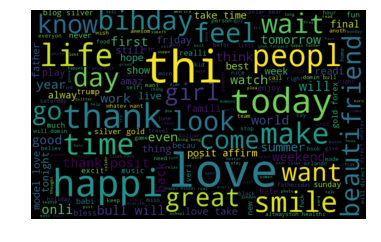

In [98]:
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [99]:
normal_words =  ' '.join([text for text in combi["tidy_tweet"][combi['label']==0]])

In [100]:
normal_words


'when father dysfunct selfish drag kid into dysfunct #run thank #lyft credit caus they offer wheelchair van #disapoint #getthank bihday your majesti #model love take with time factsguid societi #motiv huge fare talk befor they leav chao disput when they there #allshowandnogo camp tomorrow danni next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom here #ireland consum price index climb from previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf ouch junior angri #got #junior #yugyoem #omg thank have paner #thank #posit #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl blame conced goal rooney gave away free kick know bale them from there littl dude #badday #coneofsham #cat #piss #funni #laugh product happi #wine tool #week

In [101]:
wordcloud2 = WordCloud(width = 800, height = 500, random_state=21, max_font_size=110).generate(normal_words)

In [102]:
wordcloud2

In [103]:
plt.figure(figsize=(10,7))

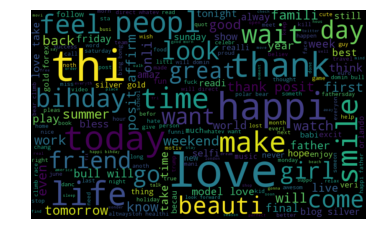

In [104]:
plt.imshow(wordcloud2, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [105]:
negative_words =  ' '.join([text for text in combi["tidy_tweet"][combi['label']==1]])

In [106]:
wordcloud3 = WordCloud(width = 800, height = 500, random_state=21, max_font_size=110).generate(negative_words)

In [107]:
plt.figure(figsize=(10,7))

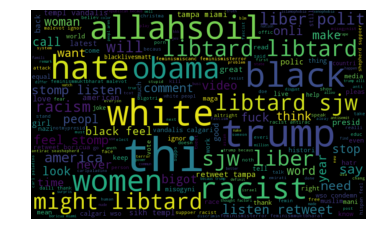

In [108]:
plt.imshow(wordcloud3, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [109]:
#considering the hashtags for the analysis 

In [110]:
def extract_hashtags(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [111]:
#extracting from normal tweets

In [113]:
HT_regular = extract_hashtags(combi['tidy_tweet'][combi['label'] == 0]) 

In [114]:
HT_negative = extract_hashtags(combi['tidy_tweet'][combi['label'] == 1]) 

In [115]:
# unnesting list

In [116]:
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

In [117]:
#plotting the top n hashtags

In [118]:
#non- racist/sexist tweets


In [119]:
a = nltk.FreqDist(HT_regular)

In [120]:
d = pd.DataFrame({'Hashtag':list(a.keys()), 'Count': list(a.values())})

In [121]:
d

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


In [124]:
#selecting top 20 most frequent hashtags
d = d.nlargest(columns = 'Count', n = 20)

In [125]:
d

,Hashtag,Count
32,love,1654
39,posit,917
58,smile,676
157,healthi,573
38,thank,534
176,fun,463
343,life,425
92,affirm,423
286,summer,390
4,model,375


C:\Users\varun-sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


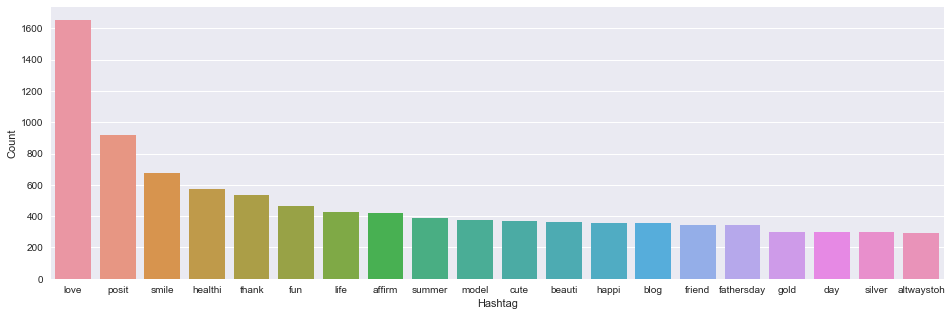

In [127]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data = d, x = "Hashtag", y= "Count")
ax.set(ylabel = "Count")
plt.show()

In [129]:
#racist/sexist tweets

In [130]:
b = nltk.FreqDist(HT_negative)

e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count' : list(b.values())})

In [132]:
#selecting top 20 most frequent

In [134]:
e = e.nlargest(columns = "Count", n=20)

C:\Users\varun-sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


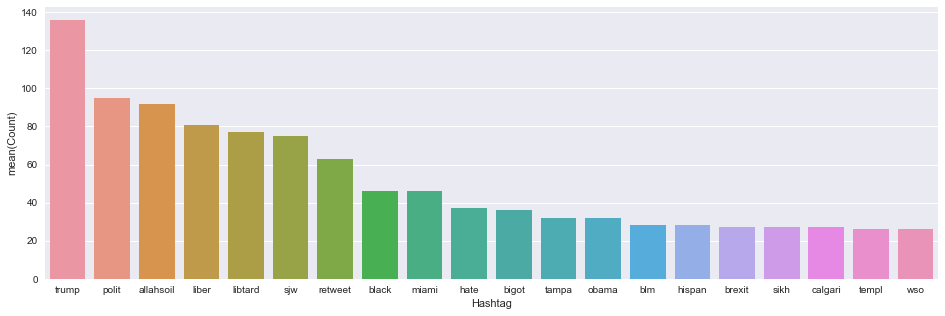

In [135]:
plt.figure(figsize = (16,5))
ax1 = sns.barplot(data = e, x="Hashtag", y= "Count")

In [136]:
#To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
#import gensim

In [140]:
#bag of words approach
bow_vectoriser = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [141]:
bow = bow_vectoriser.fit_transform(combi['tidy_tweet'])

In [143]:
bow.shape

(49159, 1000)

In [144]:
#tfidf approach
tfidf_vectoriser = TfidfVectorizer(max_df=0.90, min_df=2, max_features=2000, stop_words='english')

In [145]:
tfidf = tfidf_vectoriser.fit_transform(combi['tidy_tweet'])

C:\Users\varun-sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [146]:
tfidf.shape


(49159, 2000)

In [150]:
tfidf

<49159x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 223716 stored elements in Compressed Sparse Row format>

In [153]:
print(tfidf[0][0])

  (0, 627)	0.35965928074186004
  (0, 510)	0.6412447768973064
  (0, 972)	0.4524591490903069
  (0, 1519)	0.5047088827063054


In [154]:
#word2vec features

In [156]:
#The advantages of using word embeddings over BOW or TF-IDF are:

#1.Dimensionality reduction - significant reduction in the no. of features required to build a model.

#2.It capture meanings of the words, semantic relationships and the different types of contexts they are used in.



In [157]:
#word2vec is not a single algo, its a combbination of CBOW (Continuous bag of words) and Skip-gram model. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.

In [158]:
#training a word2vec model

In [159]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) #tokenizing

In [160]:
import gensim

ModuleNotFoundError: No module named 'gensim'